In [358]:
import urllib.request as req
import json
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup

# Catch the data from specified url

In [359]:
url = "https://www.ptt.cc/bbs/LoL/M.1683024945.A.D01.html"
response = requests.get(url)
html = response.text
#request = req.Request(url, headers = {
#    "User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'
#})
#with req.urlopen(request) as response:
#    data = response.read().decode("utf-8")

In [360]:
soup = BeautifulSoup(html, 'html.parser')
comments = soup.find_all('div', {'class': 'push'})

# use array temp to save all comments

In [361]:
temp = []
for comment in comments:
    tag = comment.find('span')
    #判斷是否為None
    if tag is not None:
        text = comment.find('span', {'class': 'f3 push-content'}).getText().strip()    
        temp.append(text)

df = pd.DataFrame(temp)
df

,0
0,: 還在想今天怎麼沒有討論區 讚讚
1,: PSG蒿兔鹿死
2,: DFM加油
3,: 坐等開盤
4,: 今天PSG第一場什麼顏色方啊？
...,...
1365,: 明天換一組打，Playin 打到禮拜天...
1366,: 好電
1367,: 賽後訪問為什麼還要鞭煙口斯w
1368,: 好險打G2 直接排在星期四下半場 LUL


In [362]:
type(df)

pandas.core.frame.DataFrame

# Analyze the key words from the comments

In [363]:
!pip install jieba
#download jieba 函式庫

In [364]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [365]:
#test if the jieba works

documents = ["還在想今天怎麼沒有討論區 讚讚"]

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('-'.join(seg_list))

還在-想-今天-怎麼-沒有-討論區- -讚-讚


In [366]:
df['seg'] = " "
index = 0
for documents in df[0]:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    seg_list = jieba.lcut(documents)
    df['seg'].iloc[index] = seg_list
    index += 1
df['seg']

0                 [:,  , 還在, 想, 今天, 怎麼, 沒有, 討論區,  , 讚, 讚]
1                                   [:,  , PSG, 蒿, 兔鹿, 死]
2                                         [:,  , DFM, 加油]
3                                          [:,  , 坐等, 開盤]
4                     [:,  , 今天, PSG, 第一, 場什麼, 顏色方, 啊, ？]
                              ...                        
1365       [:,  , 明天, 換一組, 打, ，, Playin,  , 打到, 禮拜天, ...]
1366                                           [:,  , 好電]
1367                   [:,  , 賽後訪, 問為, 什麼, 還要, 鞭, 煙口斯, w]
1368    [:,  , 好險, 打, G2,  , 直接, 排, 在, 星期四, 下半場,  ,  ,...
1369                                            [:,  , 魯]
Name: seg, Length: 1370, dtype: object

In [367]:
#擷取所有留言中的詞語

dictionary = df['seg'].to_list()
print(dictionary)

[[':', ' ', '還在', '想', '今天', '怎麼', '沒有', '討論區', ' ', '讚', '讚'], [':', ' ', 'PSG', '蒿', '兔鹿', '死'], [':', ' ', 'DFM', '加油'], [':', ' ', '坐等', '開盤'], [':', ' ', '今天', 'PSG', '第一', '場什麼', '顏色方', '啊', '？'], [':', ' ', '推文', '怎麼', '都', '好', '老'], [':', ' ', '我', '豪興奮', 'R', ' ', '有', '沒', '有人', '跟', '我', '一樣', '興奮'], [':', ' ', '多', '了', '一個', '活著', '的', '意義'], [':', ' ', '#', 'DFMWIN'], [':', ' ', '*', '推文', '老婆'], [':', ' ', '只有', '一組賽', '評主播', '喔'], [':', ' ', 'PSG', '要', '被', '虐', '爆', '搂'], [':', ' ', '聽', '說', '舞台', '很酷', ' ', '期待'], [':', ' ', '能', '不能', '證明', 'BYG', '是', '垃圾', ' ', '就', '看', '這把', '了'], [':', ' ', '今天', '要', '聽', '到', '這', '就是', '~', 'Wako', '!', '!', ' ', '不要', '這', '就是', 'wako', '?', '?'], [':', ' ', 'https', ':', '/', '/', 'i', '.', 'imgur', '.', 'com', '/', 'CLhCdz5', '.', 'jpg'], [':', ' ', '我來', '啦'], [':', ' ', '2', '個', 'BO3', ' ', '最多', '打到', '6', '場', ' ', '1', '組賽', '評主撥', '就夠', '了'], [':', ' ', '#', 'DFMWIN'], [':', ' ', 'PSG', '趕緊', '的', ' ', '輸一輸', '游回

# Sort out the dictionary list

In [368]:
#統整
listword = []
for i in range(0,1370):
    for value in dictionary[i]:
        listword.append(value)
        
statistics = pd.value_counts(listword)
print(statistics)

      2009
:     1389
了      240
=      177
的      145
      ... 
裂開       1
一換       1
爽點       1
賺麻       1
魯        1
Length: 2484, dtype: int64


In [369]:
#刪除字典中語助詞或非遊戲相關詞組 #根據測試出來的圖片
valueToBeRemoved = ['了','=','的','是',' ',
                    '：','有',':','，','就',
                    '都','吧','？''嗎','這',
                    '嗎','在','?','？','喔',
                    '好','死','嗎','真的','打',
                    '被','啊','要','怎麼','我',
                    '沒','就是','笑','不','人',
                    '魯','一換','欸','很','看',
                    '這樣','可以','也','...','說',
                    '感覺','直接','阿','閃','還是',
                    '來','多','小','大','跟',
                    '自己','不是','好像','比','會',
                    '不會','知道','自己','你','他',
                    '現在','囉','屌','幹','啥',
                    '那','那麼','那個','但','嘛',
                    '這個','可能','把','不用','不要',
                    '耶','只有','和','對','已經',
                    '不過','沒錯','聽','算','應該',
                    '什麼','完全','想','所以','下班',
                    '到底','起來','還在','我覺','較',
                    '夢','迴','早就','活','包',
                    '得','/','亂','靠','可悲',
                    '@','啦','後','+','沒有']
listword = [value for value in listword if value not in valueToBeRemoved]

statistics = pd.value_counts(listword)
statistics

PSG    52
G2     41
石頭     35
DFM    35
日本     25
       ..
裂開      1
爽點      1
賺麻      1
漂亮      1
LUL     1
Length: 2373, dtype: int64

# Data Visualization attemption

In [370]:
!pip install wordcloud
#download wordcloud 函式庫

In [371]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

In [372]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
maskword = np.array(Image.open(path.join(d, "LOL_MSI_logo2.png")))

In [373]:
from wordcloud import WordCloud
import random
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl({random.randint(0, 360)}, {random.randint(10, 40)}%, {random.randint(70, 100)}%)"

wc = WordCloud(font_path= "C:\Windows\Fonts\msjh.ttc", 
               background_color="black", 
               max_words = 1000, 
               mask = maskword,
               color_func=color_func)   

wc.generate_from_frequencies(statistics)

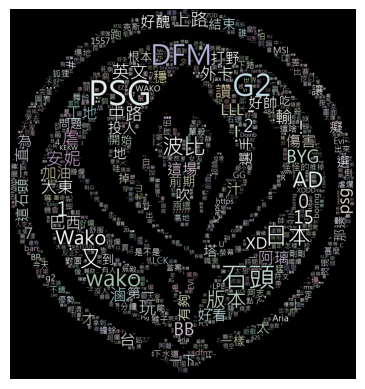

<Figure size 800x800 with 0 Axes>

In [374]:
# store to file
wc.to_file(path.join(d, "keyword.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(40,40), dpi =20)
plt.show()